# Aufgabe 41: Entfaltung mit quadratischen Matrizen

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# matplotlib Einstellungen
%config InlineBackend.figure_formats = ['svg','png']
import matplotlib as mpl
mpl.rcParams['font.size'] = 13
mpl.rcParams['figure.figsize'] = (7,5)
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

In [3]:
np.set_printoptions(linewidth=150)

In [4]:
rng = np.random.default_rng(seed=1234)

## a) Antwortmatrix erzeugen

### Theorie:

$$
A = 
\begin{pmatrix}
    1-\epsilon & \epsilon & 0 & ... & 0 \\
    \epsilon & 1-2\epsilon & \epsilon & ... & 0 \\
    0 & \epsilon & 1-2\epsilon & ... & 0 \\
    ... & ... & ... & ... & ... \\
    0 & ... & ... & 1-2\epsilon & \epsilon \\
    0 & ... & ... & \epsilon & 1-\epsilon \\
\end{pmatrix}
$$

Was für einen Messprozess beschreibt die Matrix A?  

$\vec{g} = A \vec{f}$, wobei  

- $\vec{f} \hat{=}$ Verteilung der "wahren" Werte $\vec{y}$ des physikalischen Prozesses  

- $\vec{g} \hat{=}$ Verteilung der gemessenen Werte $\vec{x}$ des physikalischen Prozesses  

- $f_j, g_i$ sind absolute oder relative Anzahlen bzw. Wahrscheinlichkeiten  

- $y_j$ sind die gebinnten Abhängigkeiten der Theorie (z.B. Energie, Masse, Impuls, ...)  

- $x_i$ sind die gebinnten direkt gemessenen Werte (Ladungen, Orte, Zeiten)  

Für den Spezialfall dieser Matrix:  
- $n \times n \Rightarrow$ Genau gleich viele Bins in $y$ und $x$  

- fast diagonal $\Rightarrow$ Verschmierung der Messung, aber nur in Nachbar-Bins mit Wahrscheinlichkeit $\epsilon$  

### Implementierung:

Es sei $\epsilon = 0.23$ und $n \geq 3$

In [5]:
def buildA(n, epsilon=0.23):
    # main diagonal
    main_diag = np.ones(shape=(n,))
    main_diag[[0, -1]] -= epsilon
    main_diag[1:-1] -= 2*epsilon
    
    # second diagonal
    second_diag = epsilon * np.ones(shape=(n-1,))
    
    # insert into the matrix
    A = np.diag(main_diag, k=0)
    A += np.diag(second_diag, k=1)
    A += np.diag(second_diag, k=-1)
    
    return A

In [6]:
# Example:
print(f'A(n=5) = \n{buildA(5)}')

A(n=5) = 
[[0.77 0.23 0.   0.   0.  ]
 [0.23 0.54 0.23 0.   0.  ]
 [0.   0.23 0.54 0.23 0.  ]
 [0.   0.   0.23 0.54 0.23]
 [0.   0.   0.   0.23 0.77]]


## b) Monte Carlo Simulation der Messung  

$\vec{f}_{wahr} = (193, 485, 664, 763, 804, 805, 779, 736, 684, 626, 566, 508, 452, 400, 351, 308, 268, 233, 202, 173)^T$  
wobei $\vec{y}$ im Intervall $[0,2]$ gleichmäßig gebinnt ist.

- $\vec{\lambda} = A \vec{f}_{wahr}$ seien die Erwartungswerte der Messung.  

- Jeder Bin $i$ von $\vec{x}$ sei Poisson-verteilt mit Erwartungswert $\lambda_i$. 

- Das Intervall von $\vec{x}$ ist nicht näher definiert und wird als $[0,1]$ gewählt.  

- Simuliere die Messwerte $\vec{g}_{mess}$ durch Ziehung aus den Poisson-Verteilungen. (im Code g_sim genannt)  

- Die Varianz von $\vec{g}_{mess}$ ist $Var[\vec{g}_{mess}] = \vec{\lambda}$

In [7]:
def simulate_g(f_true, A, rng):
    lam = A @ f_true
    g = rng.poisson(lam)
    return g, lam

In [8]:
f_true = np.array([193, 485, 664, 763, 804, 805, 779, 736, 684, 626,
                   566, 508, 452, 400, 351, 308, 268, 233, 202, 173])

# define bin edges and bin centers (for plotting)
y_bins = np.linspace(0, 2, len(f_true)+1)
y_diffs = np.diff(y_bins)
y_centers = y_bins[:-1] + y_diffs/2


print(f'f_true.shape = {f_true.shape}')
print(f'y_bins.shape = {y_bins.shape}')
print(f'y_centers.shape = {y_centers.shape}')

f_true.shape = (20,)
y_bins.shape = (21,)
y_centers.shape = (20,)


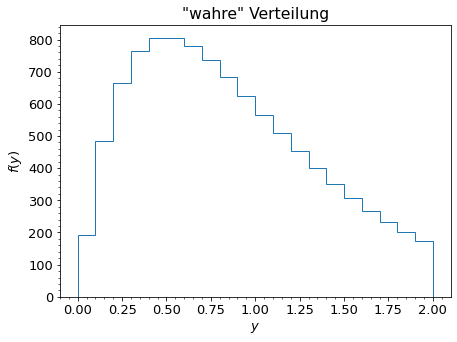

In [9]:
# Plot the ground truth
plt.title('"wahre" Verteilung')
plt.hist(y_centers, bins=y_bins, weights=f_true, histtype='step')
plt.xlabel('$y$')
plt.ylabel('$f(y)$')
plt.show()

In [10]:
# simulate g
A = buildA(20)

g_sim, lam = simulate_g(f_true, A, rng)
print(f'lambda = {lam}')
print(f'g_sim = {g_sim}')

# define bin edges and bin centers (for plotting)
x_bins = np.linspace(0, 1, len(g_sim)+1)
x_centers = x_bins[:-1] + np.diff(x_bins)/2

lambda = [260.16 459.01 645.6  749.66 794.8  798.79 775.09 733.93 682.62 625.54 566.46 508.46 452.92 400.69 352.38 308.69 269.15 233.92 202.46 179.67]
g_sim = [289 447 625 826 790 834 789 753 654 575 578 504 479 368 373 329 263 210 204 178]


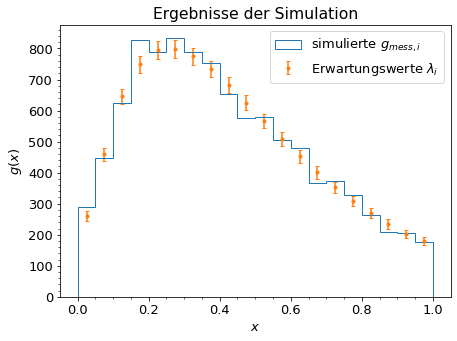

In [11]:
# Plot the simulated results
plt.title('Ergebnisse der Simulation')
plt.hist(x_centers, bins=x_bins, weights=g_sim, histtype='step', label=r'simulierte $g_{mess,i}$')
plt.errorbar(x_centers, lam, np.sqrt(lam), fmt='.', capsize=2, label='Erwartungswerte $\lambda_i$')
plt.xlabel('$x$')
plt.ylabel('$g(x)$')

plt.legend(loc='upper right')
plt.show()

## c) Diagonalisiere die Faltung

Diagonalisiere $A$ über $A = U D U^{-1}$, wobei $D$ diagonal ist.  
Dafür bestimme die Eigenwerte $\omega_i$ von $A$ und schreibe sie auf die Diagonale von $D$  
und bestimme die Eigenvektoren $\vec{v}_i$ von $A$ und schreibe sie in die Spalten von $U$.

Sortiere die Eigenwerte absteigend.

Damit wird $\vec{g} = A \vec{f}$ zu $U^{-1} \vec{g} = D U^{-1} \vec{f}$.  
Definiere nun $\vec{c} = U^{-1} \vec{g}$ und $\vec{b} = U^{-1} \vec{f}$.  

Vorteil dieser Darstellung ist, dass $c_j, b_j$ unabhängig transformiert werden.  
$\Rightarrow c_j = \omega_j \cdot b_j$  
$\Leftrightarrow b_j = c_j \,/\, \omega_j$

Die Matrix $D$ ist diagonal und somit einfach zu invertieren.  
Die Matrix $U$ ist orthogonal ($U^{-1} = U^T$) und somit auch einfach zu invertieren.

In [12]:
# Calculate the eigenvalues and eigenvectors of A
w, v = np.linalg.eig(A)

print(f'w.shape = {w.shape}')
print(f'v.shape = {v.shape}')

w.shape = (20,)
v.shape = (20, 20)


In [13]:
# sort the eigenvalues and eigenvectors descending
sorted_idx = np.argsort(w) # is sorted ascending
sorted_idx = np.flip(sorted_idx) # is sorted descending
with np.printoptions(precision=3):
    print(f'omega_unsorted = {w}')
    print(f'omega_sorted   = {w[sorted_idx]}')

omega_unsorted = [0.086 0.103 0.13  0.168 0.215 0.27  0.331 0.398 0.468 0.54  0.612 0.682 0.749 0.81  0.865 1.    0.994 0.977 0.95  0.912]
omega_sorted   = [1.    0.994 0.977 0.95  0.912 0.865 0.81  0.749 0.682 0.612 0.54  0.468 0.398 0.331 0.27  0.215 0.168 0.13  0.103 0.086]


In [14]:
# create the matrices D and U
D = np.diag(w[sorted_idx])
U = v[:, sorted_idx]

# invert D and U
D_inv = np.linalg.inv(D)  # = 1/D
U_inv = np.linalg.inv(U)  # = U.T

Just for fun die Matrizen darstellen:  
(Man sieht die oben beschriebenen Eigenschaften von $D$ und $U$)

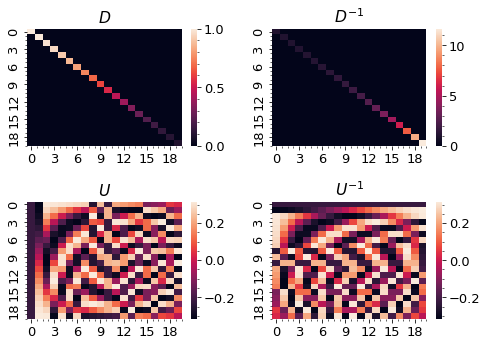

In [15]:
# visualize the matrices
!pip install seaborn > /dev/null
import seaborn as sns

fig, axs = plt.subplots(2,2)

axs[0,0].set_title('$D$')
sns.heatmap(D, ax=axs[0,0])

axs[0,1].set_title('$D^{-1}$')
sns.heatmap(D_inv, ax=axs[0,1])

axs[1,0].set_title('$U$')
sns.heatmap(U, ax=axs[1,0])

axs[1,1].set_title('$U^{-1}$')
sns.heatmap(U_inv, ax=axs[1,1])

plt.tight_layout()
plt.show()

## d) Transformiere $\vec{f} \rightarrow \vec{b}$ und $\vec{g} \rightarrow \vec{c} \rightarrow \vec{b}$

$\vec{c} = U^{-1} \vec{g}$ und $\vec{b} = U^{-1} \vec{f}$  

$\vec{b}_{mess} = D^{-1} U^{-1} \vec{g}_{mess}$

Kovarianzmatrix über die "BVB-Formel" der Fehlerfortpflanzung (die Variablen haben nichts mit der Aufgabe zu tun):  
Lineare Transformation: $\vec{y} = B \vec{x}$  
$\Rightarrow$ Kovarianzmatrix: $Var[\vec{y}] = B \cdot Var[\vec{x}] \cdot B^T$

$\Rightarrow$ $Var[\vec{b}_{mess}] = (D^{-1} U^{-1}) \cdot Var[\vec{g}_{mess}] \cdot (D^{-1} U^{-1})^T$  
Wobei hier $Var[\vec{g}_{mess}] = Diag[\vec{\lambda}]$

In [16]:
# calculate the transformed distributions
b_true = U_inv @ f_true

b_sim = D_inv @ U_inv @ g_sim

In [17]:
# calculate the covariance matrix
Cov_g_sim = np.diag(lam)

Cov_b_sim = (D_inv @ U_inv) @ Cov_g_sim @ (D_inv @ U_inv).T
Var_b_sim = np.diag(Cov_b_sim)



In [18]:
# norm the b on it's std.-deviation
b_norm = np.abs(b_sim / np.sqrt(Var_b_sim))

In [19]:
with np.printoptions(precision=2):
    print(f'b_true = \n{b_true}')
    print(f'b_sim  = \n{b_sim}')
    print(f'b_norm = \n{b_norm}')

b_true = 
[-2236.07  -676.69  -488.77  -333.32  -275.06  -169.02  -140.1    -92.29    80.09   -54.83    49.64   -35.52   -32.42   -22.39   -20.85    14.22
    12.89     8.15    -5.47    -2.91]
b_sim  = 
[-2.25e+03 -7.06e+02 -4.71e+02 -3.32e+02 -3.22e+02 -1.95e+02 -1.18e+02 -6.73e+01  5.92e+01 -9.67e+01 -2.57e+01  7.12e+01  5.05e-01  7.23e+01
 -2.77e+01 -1.69e+01 -1.10e+01  3.32e+02 -5.68e+02  7.44e+01]
b_norm = 
[1.01e+02 3.41e+01 2.14e+01 1.43e+01 1.32e+01 7.58e+00 4.29e+00 2.26e+00 1.81e+00 2.65e+00 6.20e-01 1.49e+00 8.98e-03 1.07e+00 3.33e-01 1.62e-01
 8.16e-02 1.90e+00 2.51e+00 2.65e-01]


In [20]:
# for plotting the "bin-edges" and "bin-centers"
b_idxs = np.arange(len(b_sim)+1)
b_centers = b_idxs[:-1] + 0.5

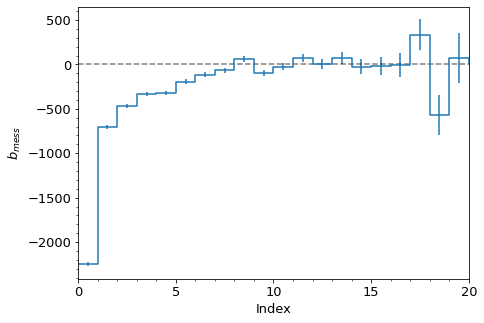

In [21]:
# plot the transformed distributions
plt.axhline(0, linestyle='--', color='k', alpha=0.5)
plt.step(b_idxs,np.append(b_sim,0), where='post')
plt.errorbar(b_centers, b_sim, np.sqrt(Var_b_sim), fmt=' ', color='C0')
plt.xticks(np.arange(0,21,5))
plt.xlim(0,20)
plt.xlabel('Index')
plt.ylabel(r'$b_{mess}$')
plt.show()

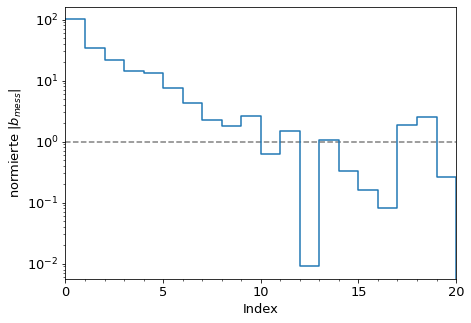

In [22]:
# plot the transformed normalized distributions
plt.axhline(1, linestyle='--', color='k', alpha=0.5)
plt.step(b_idxs,np.append(b_norm,0), where='post')
plt.yscale('log')
plt.xticks(np.arange(0,21,5))
plt.xlim(0,20)
plt.xlabel('Index')
plt.ylabel(r'normierte $|b_{mess}|$')
plt.show()

Im Plot der normierten $|\vec{b}_{mess}|$ sind diejenigen $b_j$ die unter 1 dargestellt werden, nicht für die Analyse relevant.   
Deren Standardabweichung ist größer als der Wert und somit enthalten diese Koeffizienten eigentlich keine nützliche Information.  

**Anmerkung:**  
Wir haben noch nicht so ganz verstanden was diese $b_j$ überhaupt aussagen.  
Und wir sind auch sehr verwirrt warum die bei uns teilweise negativ sind.  
Den Betrag haben wir nur genommen, damit man sie logarithmisch darstellen kann und damit es so aussieht wie in der Vorlesung.

## e) Regularisieren und Entfalten

$\vec{f}_{mess} = U \cdot \vec{b}_{mess}$  
$\Rightarrow$ $Var[\vec{f}_{mess}] = U \cdot Var[\vec{b}_{mess}] \cdot U^T$

Regularisierung: Schneide alle Koeffizienten $b_j$ ab einem bestimmten Cutoff-Index ab bzw. setze diese auf 0.  


In [23]:
# unfolding with regularization
def unfold_b(b, Cov_b, U, cutoff_idx):
    # regularize via cutoff
    b_reg = b[:cutoff_idx]
    Cov_b_reg = Cov_b_sim[:cutoff_idx,:cutoff_idx]
    U_reg = U[:,:cutoff_idx]
    
    f_reg = U_reg @ b_reg
    Cov_f_reg = U_reg @ Cov_b_reg @ U_reg.T
    
    return f_reg, Cov_f_reg

In [24]:
# unfolding with regularization
f_no_reg, Cov_f_no_reg = unfold_b(b_sim, Cov_b_sim, U, cutoff_idx=20)
Var_f_no_reg = np.diag(Cov_f_no_reg)

cutoff_idx = 10
f_reg, Cov_f_reg = unfold_b(b_sim, Cov_b_sim, U, cutoff_idx)
Var_f_reg = np.diag(Cov_f_reg)

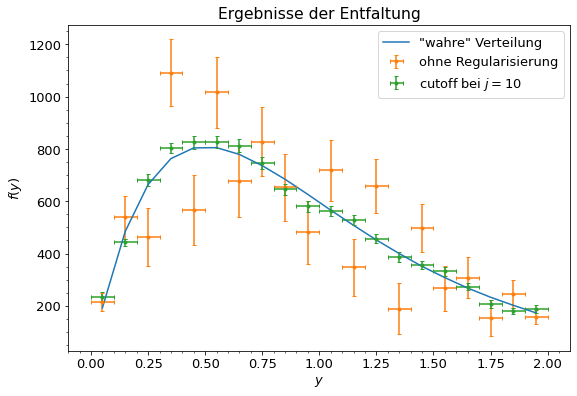

In [25]:
# plot the resulting distributions
plt.figure(figsize=(9,6))
plt.title('Ergebnisse der Entfaltung')

plt.plot(y_centers, f_true, '-', label='"wahre" Verteilung')

plt.errorbar(y_centers, f_no_reg, yerr=np.sqrt(Var_f_no_reg), xerr=y_diffs/2, fmt='.', capsize=2, label='ohne Regularisierung')

plt.errorbar(y_centers, f_reg, yerr=np.sqrt(Var_f_reg), xerr=y_diffs/2, fmt='.', capsize=2, label=f'cutoff bei $j={cutoff_idx}$')

plt.xlabel('$y$')
plt.ylabel('$f(y)$')
plt.legend()
plt.show()

- Was ist der Unterschied mit und ohne Regularisierung:  
    Die nicht regularisierte Lösung enthält Oszillationen, die unerwünscht sind.  
    Die Regularisierung unterdrückt dies und die Entfaltung passt deutlich besser zur "wahren" Verteilung.  
    Außerdem sind die Fehler mit Regularisierung deutlich kleiner.

Just for fun die Kovarianzmatrizen darstellen:  
(Die Korrelation sieht irgendwie sehr unerwartet aus.)

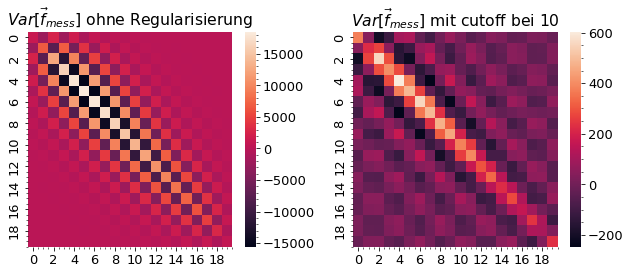

In [26]:
# visualize the covariance matrices
!pip install seaborn > /dev/null
import seaborn as sns

fig, axs = plt.subplots(1,2, figsize=(9,4))

axs[0].set_title(r'$Var[\vec{f}_{mess}]$ ohne Regularisierung')
sns.heatmap(Cov_f_no_reg, ax=axs[0])

axs[1].set_title(r'$Var[\vec{f}_{mess}]$ mit cutoff bei '+f'{cutoff_idx}')
sns.heatmap(Cov_f_reg, ax=axs[1])

plt.tight_layout()
plt.show()